In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api  import ols
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column',None)
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder

In [2]:
import os
os.chdir('D:\IMARTICUS\CAPSTONE PROJECT\Tourism prediction')

In [3]:
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
pd.set_option('display.max_column',None)
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv("D:\IMARTICUS\CAPSTONE PROJECT\Tourism prediction\Train (1).csv")
data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13,0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14,7,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1,31,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11,0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,Jan-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7,4,Cash,Yes,No comments,1657500.0


In [5]:
data.shape

(4809, 23)

In [6]:
data.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

### CHECKING NULL VALUES IN DATA

In [8]:
data.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

### LET'S FILL NULL VALUES

### 1.TRAVEL_WITH

In [9]:
df = pd.DataFrame(data)

# calculate median of non-null values in travel_with column
mode_travel_with = df['travel_with'].dropna().mode()[0]

# replace null values in travel_with column with mode
df['travel_with'].fillna(mode_travel_with, inplace=True)

## 2.total_female

In [10]:
df = pd.DataFrame(data)

# calculate median of non-null values in travel_with column
mode_travel_with = df['total_female'].dropna().mode()[0]

# replace null values in travel_with column with mode
df['total_female'].fillna(mode_travel_with, inplace=True)

### 3.TOTAL_MALE

In [11]:
# calculate median of non-null values in travel_with column
mode_travel_with = df['total_male'].dropna().mode()[0]

# replace null values in travel_with column with mode
df['total_male'].fillna(mode_travel_with, inplace=True)

### 4.MOST_IMPRESSING

In [12]:
# calculate median of non-null values in travel_with column
mode_travel_with = df['most_impressing'].dropna().mode()[0]

# replace null values in travel_with column with mode
df['most_impressing'].fillna(mode_travel_with, inplace=True)

In [13]:
data.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
dtype: int64

### NULL VALUES ARE REPLACED WITH MODE, BECAUSE IT'S CATEGORICAL

In [14]:
data.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4809.000000,4809.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926804,1.009565,8.488043,2.304429,8.114389e+06
std,1.287841,1.138273,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


### TOTAL_COST(TARGET VARIABLE)

In [15]:
data.total_cost.value_counts()

1657500.0     154
3315000.0     109
828750.0       88
497250.0       76
331500.0       76
             ... 
240337.5        1
2361937.5       1
425000.0        1
37956750.0      1
2246636.7       1
Name: total_cost, Length: 1637, dtype: int64

<AxesSubplot:xlabel='total_cost', ylabel='Density'>

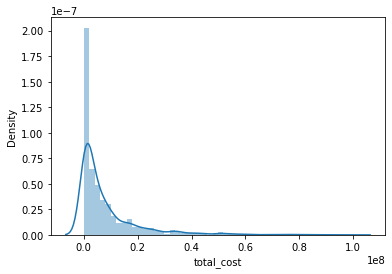

In [16]:
sns.distplot(data['total_cost'])

### DATA IS NOT NORMAL(SKEWED)

<AxesSubplot:xlabel='total_cost'>

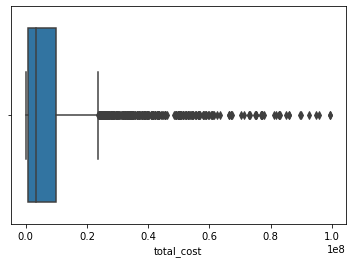

In [17]:
sns.boxplot(x = 'total_cost', data = data)

### FIX THE OUTLIERS

In [18]:
iqr_fa = stats.iqr(data['total_cost'])
iqr_fa

9132825.0

In [19]:
Q1 = data['total_cost'].quantile(0.25)

Q3 = data['total_cost'].quantile(0.75)

upper_bound = Q3 + 1.5*iqr_fa
lower_bound = Q1 - 1.5*iqr_fa

In [20]:
data['total_cost'] = np.where(data['total_cost'] > upper_bound,upper_bound,data['total_cost'])

### Outliers has been handled

<AxesSubplot:xlabel='total_cost'>

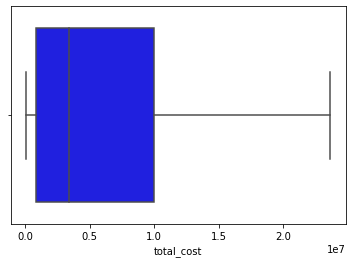

In [21]:
sns.boxplot(data = data , x = 'total_cost' , color='b')

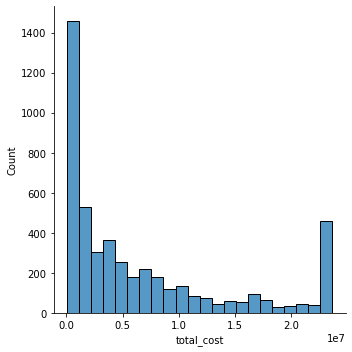

In [22]:
sns.displot(data = data , x = 'total_cost')  #positively skewed

<AxesSubplot:>

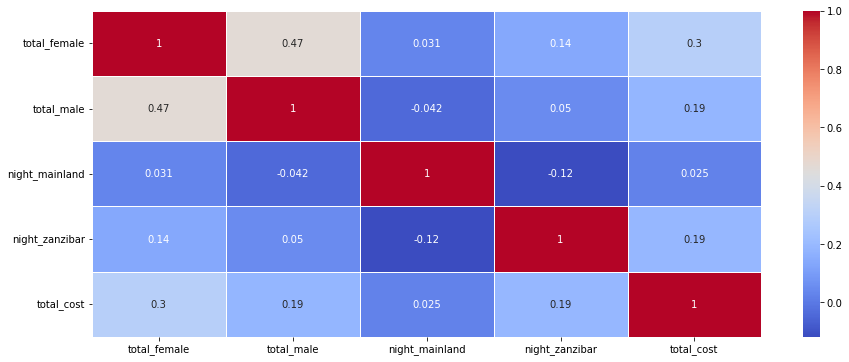

In [23]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True,linewidth=.5)

### 0.COUNTRY

In [24]:
data.country.value_counts()

UNITED STATES OF AMERICA    695
UNITED KINGDOM              533
ITALY                       393
FRANCE                      280
ZIMBABWE                    274
                           ... 
NIGER                         1
MYANMAR                       1
DOMINICA                      1
TUNISIA                       1
ESTONIA                       1
Name: country, Length: 105, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

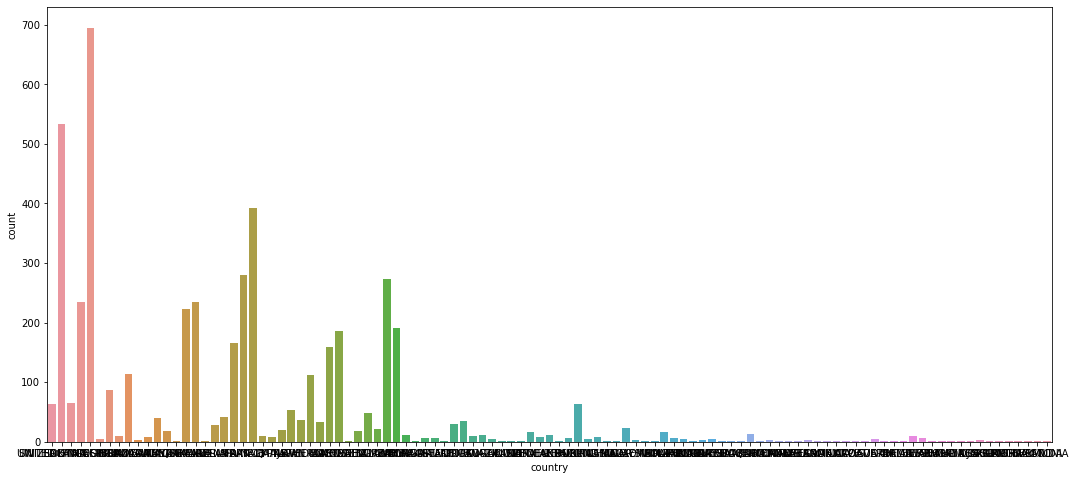

In [25]:
plt.figure(figsize=(18,8))
sns.countplot(data['country'])
plt.show

### 1.AGE_GROUP

In [26]:
data.age_group.value_counts()

25-44     2487
45-64     1391
Jan-24     624
65+        307
Name: age_group, dtype: int64

<AxesSubplot:xlabel='age_group', ylabel='count'>

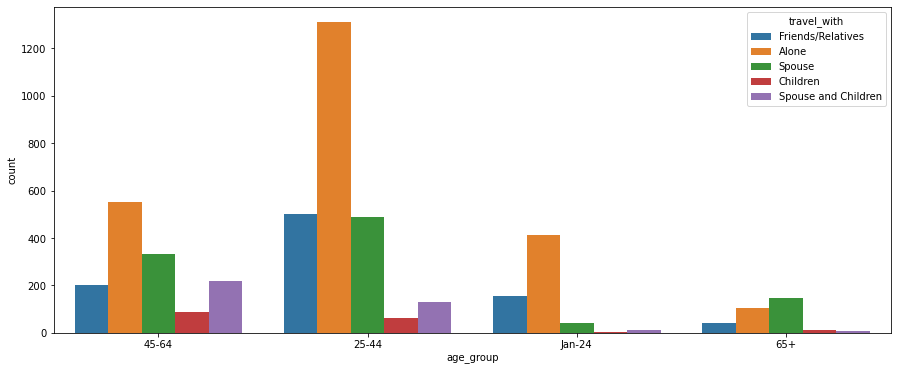

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'age_group', hue = 'travel_with', data = data)

### 2.TRAVEL_WITH

In [28]:
data.travel_with.value_counts()

Alone                  2379
Spouse                 1005
Friends/Relatives       895
Spouse and Children     368
Children                162
Name: travel_with, dtype: int64

<AxesSubplot:xlabel='travel_with', ylabel='count'>

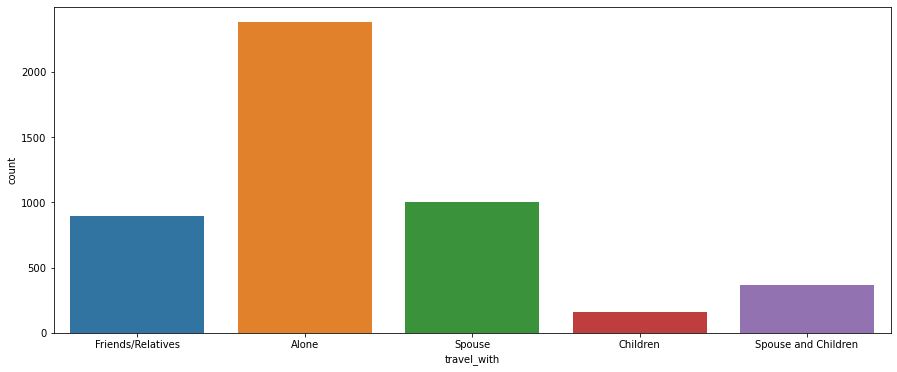

In [29]:
plt.figure(figsize=(15,6))
sns.countplot( x = 'travel_with', data = data)

### CONSIDERING "PURPOSE" AS HUE

<AxesSubplot:xlabel='travel_with', ylabel='count'>

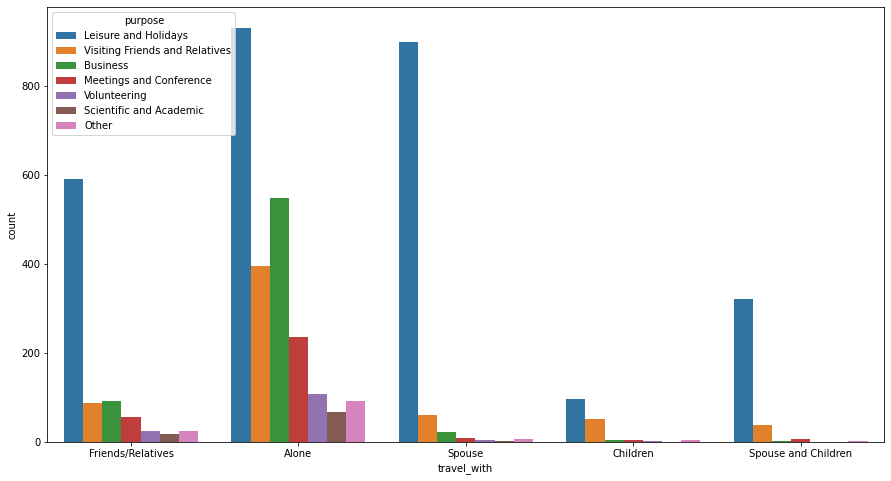

In [30]:
plt.figure(figsize=(15,8))
sns.countplot( x = 'travel_with', hue = 'purpose', data = data)

### 3.TOTAL_FEMALE

In [31]:
data.total_female.value_counts()

1.0     2421
0.0     1669
2.0      463
3.0      144
4.0       46
5.0       25
6.0       15
7.0       10
10.0       4
9.0        4
12.0       3
11.0       3
15.0       1
49.0       1
Name: total_female, dtype: int64

<AxesSubplot:xlabel='total_female', ylabel='count'>

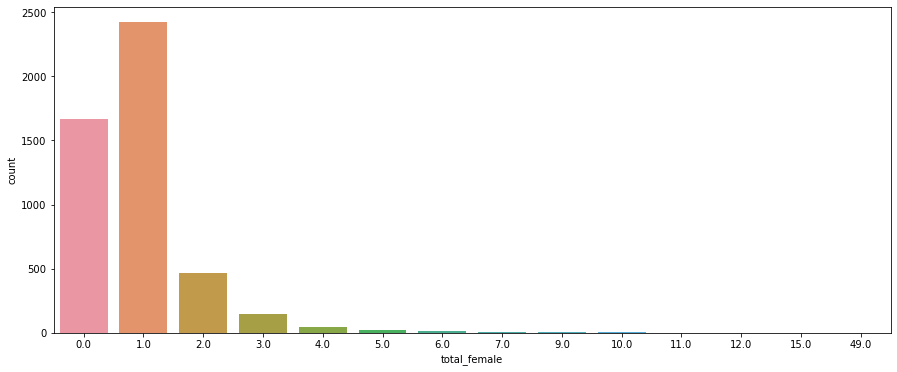

In [32]:
plt.figure(figsize = (15,6))
sns.countplot(data = data, x = 'total_female')

### 4.TOTAL_MALE

In [33]:
data.total_male.value_counts()

1.0     2966
0.0     1137
2.0      478
3.0      139
4.0       46
6.0       17
5.0       15
15.0       2
7.0        2
10.0       2
9.0        2
17.0       1
12.0       1
44.0       1
Name: total_male, dtype: int64

<AxesSubplot:xlabel='total_male', ylabel='count'>

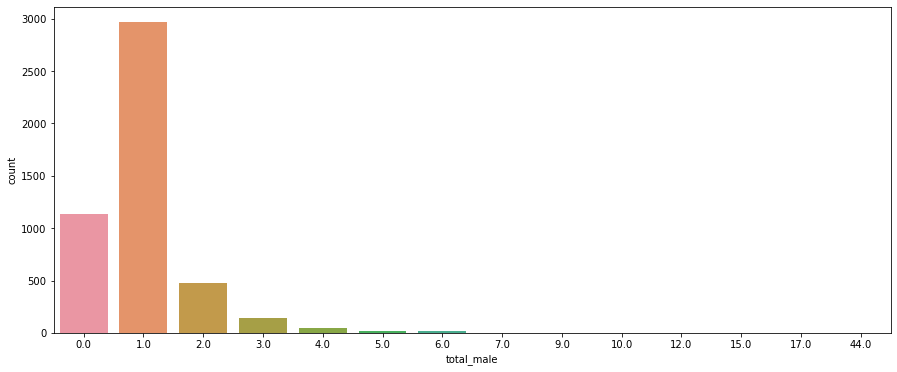

In [34]:
plt.figure(figsize=(15,6))
sns.countplot(data = data, x = 'total_male')

### 5.PURPOSE

In [35]:
data.purpose.value_counts()

Leisure and Holidays              2840
Business                           671
Visiting Friends and Relatives     633
Meetings and Conference            312
Volunteering                       138
Other                              128
Scientific and Academic             87
Name: purpose, dtype: int64

<AxesSubplot:xlabel='purpose', ylabel='count'>

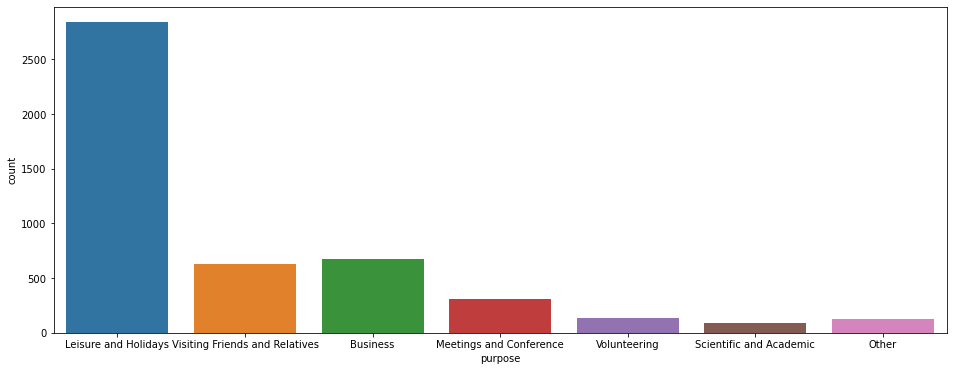

In [36]:
plt.figure(figsize=(16,6))
sns.countplot(data = data, x = 'purpose')

### 6.MAIN_ACTIVITY

In [37]:
data.main_activity.value_counts()

Wildlife tourism            2259
Beach tourism               1025
Hunting tourism              457
Conference tourism           367
Cultural tourism             359
Mountain climbing            234
business                      58
Bird watching                 37
Diving and Sport Fishing      13
Name: main_activity, dtype: int64

<AxesSubplot:xlabel='main_activity', ylabel='count'>

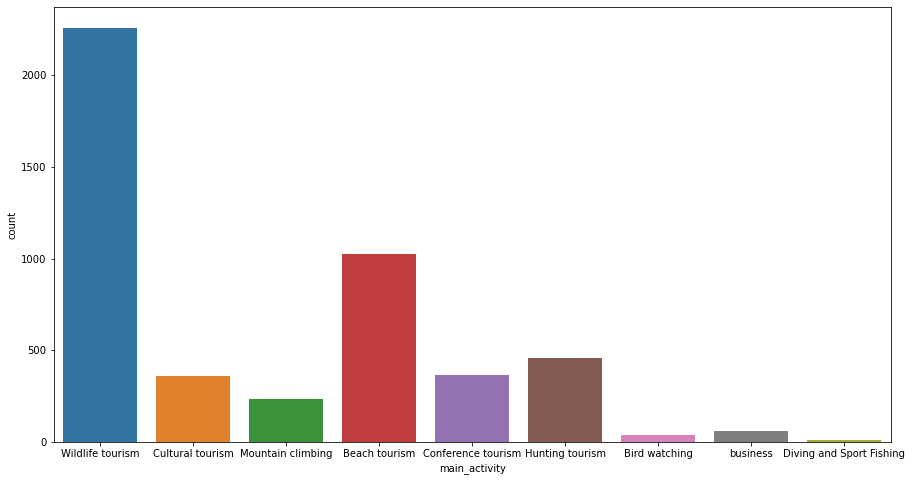

In [38]:
plt.figure(figsize= (15,8))
sns.countplot(data = data, x = 'main_activity')

### 7.PACKAGE_FOOD

In [39]:
data.package_food.value_counts()

No     2748
Yes    2061
Name: package_food, dtype: int64

<AxesSubplot:xlabel='package_food', ylabel='count'>

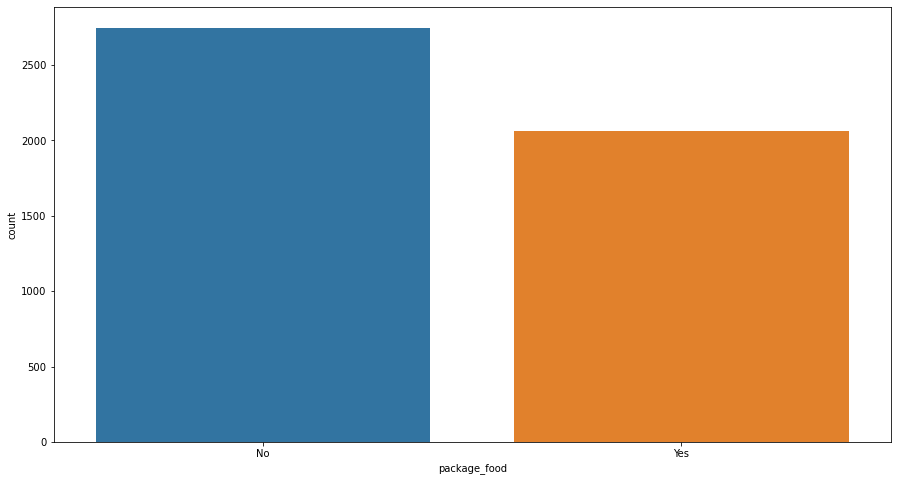

In [40]:
plt.figure(figsize=(15,8))
sns.countplot(data = data, x = 'package_food')

### 8.INFO_SOURCE

In [41]:
data.info_source.value_counts()

Travel, agent, tour operator      1913
Friends, relatives                1635
others                             490
Newspaper, magazines,brochures     359
Radio, TV, Web                     249
Trade fair                          77
Tanzania Mission Abroad             68
inflight magazines                  18
Name: info_source, dtype: int64

<AxesSubplot:xlabel='info_source', ylabel='count'>

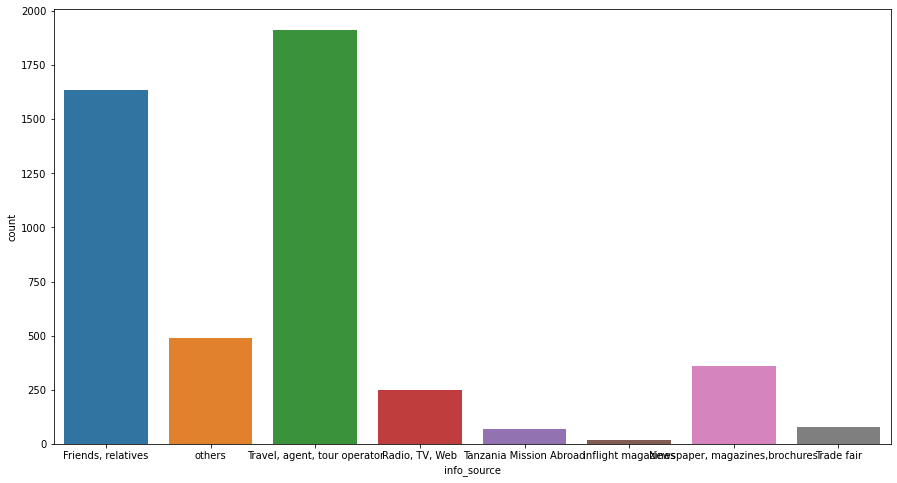

In [42]:
plt.figure(figsize=(15,8))
sns.countplot(data = data, x = 'info_source')

### 9.Package_Transport_TZ

In [43]:
data.package_transport_tz.value_counts()

No     2919
Yes    1890
Name: package_transport_tz, dtype: int64

<AxesSubplot:xlabel='package_transport_tz', ylabel='count'>

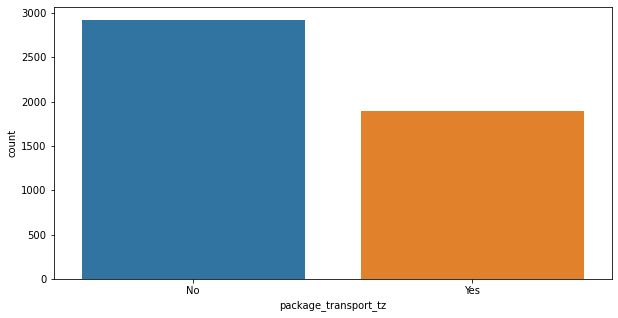

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(data = data, x = 'package_transport_tz')

### 10.Package_Sightseeing

In [45]:
data.package_sightseeing.value_counts()

No     3319
Yes    1490
Name: package_sightseeing, dtype: int64

<AxesSubplot:xlabel='package_sightseeing', ylabel='count'>

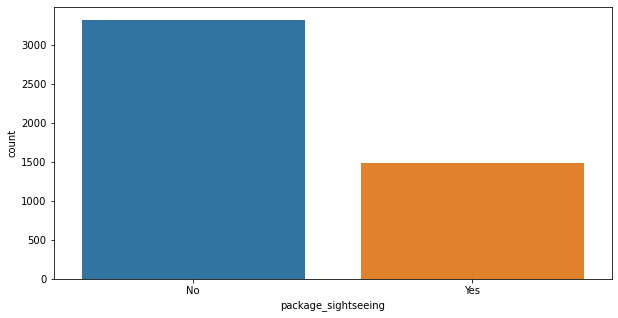

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(data = data, x = 'package_sightseeing')

### 11.Package_Guided_Tour

In [47]:
data.package_guided_tour.value_counts()

No     3259
Yes    1550
Name: package_guided_tour, dtype: int64

<AxesSubplot:xlabel='package_guided_tour', ylabel='count'>

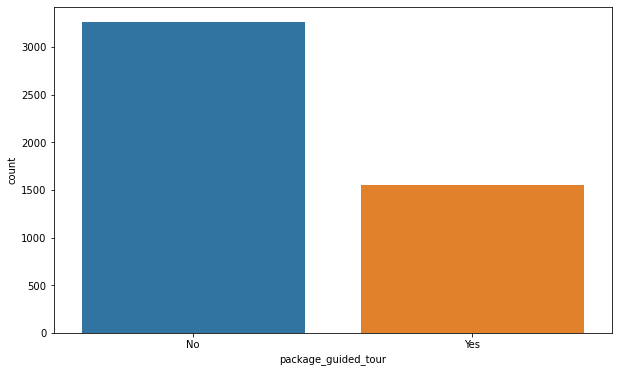

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = 'package_guided_tour')

### 12.Package_Insurance

In [49]:
data.package_insurance.value_counts()

No     4079
Yes     730
Name: package_insurance, dtype: int64

<AxesSubplot:xlabel='package_insurance', ylabel='count'>

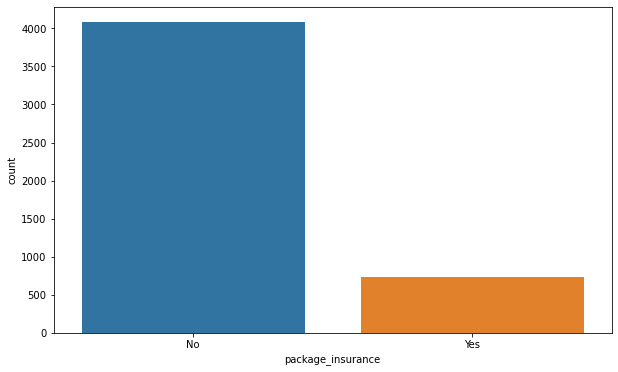

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = 'package_insurance')

### 13.Night_Mainland

In [51]:
data.night_mainland.value_counts()

0      537
2      425
7      414
3      395
4      379
      ... 
66       1
130      1
69       1
120      1
145      1
Name: night_mainland, Length: 64, dtype: int64

<AxesSubplot:xlabel='night_mainland', ylabel='count'>

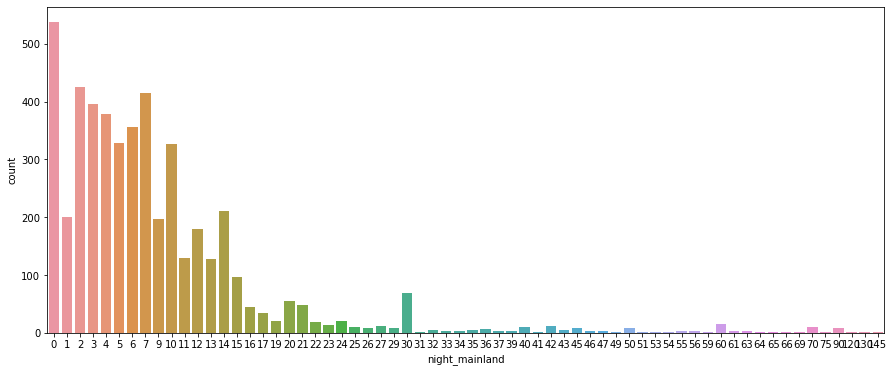

In [52]:
plt.figure(figsize = (15,6))
sns.countplot(data = data, x = 'night_mainland')

### 14.Night_Zanzibar

In [53]:
data.night_zanzibar.value_counts()

0     3023
7      367
4      282
3      261
5      229
6      184
2      128
10      62
14      50
1       48
9       39
11      25
13      25
12      22
15      17
17       9
30       4
25       4
19       4
43       3
16       3
22       3
26       2
23       2
27       2
60       2
20       2
21       1
24       1
33       1
35       1
31       1
50       1
61       1
Name: night_zanzibar, dtype: int64

<AxesSubplot:xlabel='night_zanzibar', ylabel='count'>

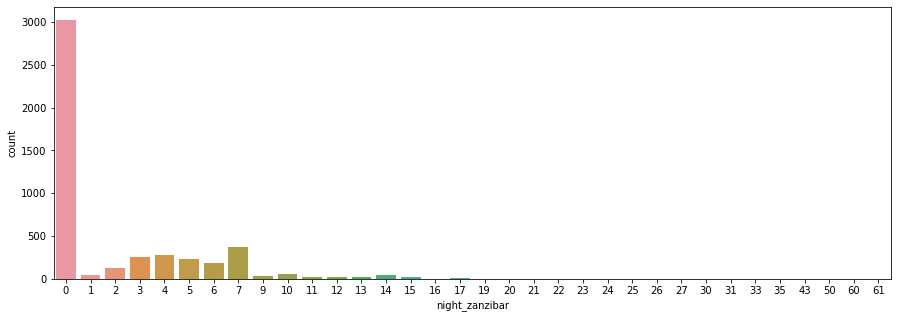

In [54]:
plt.figure(figsize = (15,5))
sns.countplot(data = data, x = 'night_zanzibar')

### 15.Payment_Mode

In [55]:
data.payment_mode.value_counts()

Cash                 4172
Credit Card           622
Other                   8
Travellers Cheque       7
Name: payment_mode, dtype: int64

<AxesSubplot:xlabel='payment_mode', ylabel='count'>

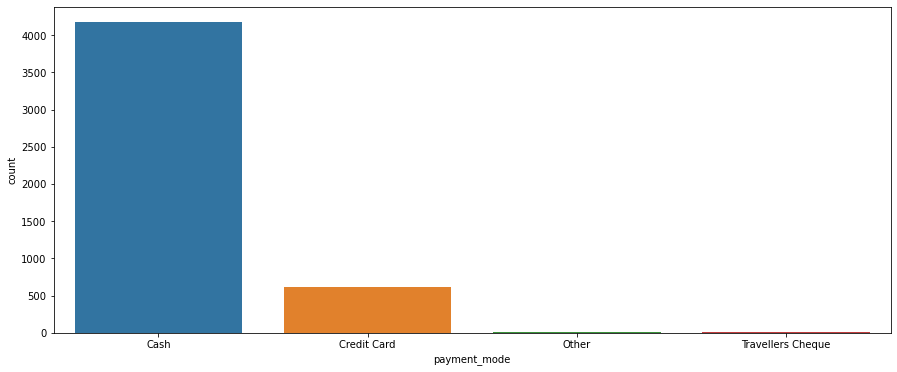

In [56]:
plt.figure(figsize=(15,6))
sns.countplot(data = data, x = 'payment_mode')

### 16.First_Trip_TZ

In [57]:
data.first_trip_tz.value_counts()

Yes    3243
No     1566
Name: first_trip_tz, dtype: int64

<AxesSubplot:xlabel='first_trip_tz', ylabel='count'>

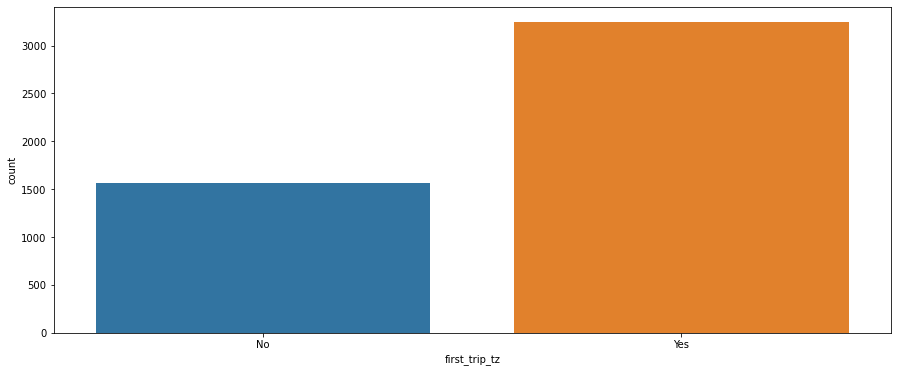

In [58]:
plt.figure(figsize=(15,6))
sns.countplot(data = data, x = 'first_trip_tz')

### 17.Most_Impressing

In [59]:
data.most_impressing.value_counts()

Friendly People                         1854
 Wildlife                               1038
No comments                              743
Wonderful Country, Landscape, Nature     507
Good service                             365
Excellent Experience                     271
Satisfies and Hope Come Back              31
Name: most_impressing, dtype: int64

<AxesSubplot:xlabel='most_impressing', ylabel='count'>

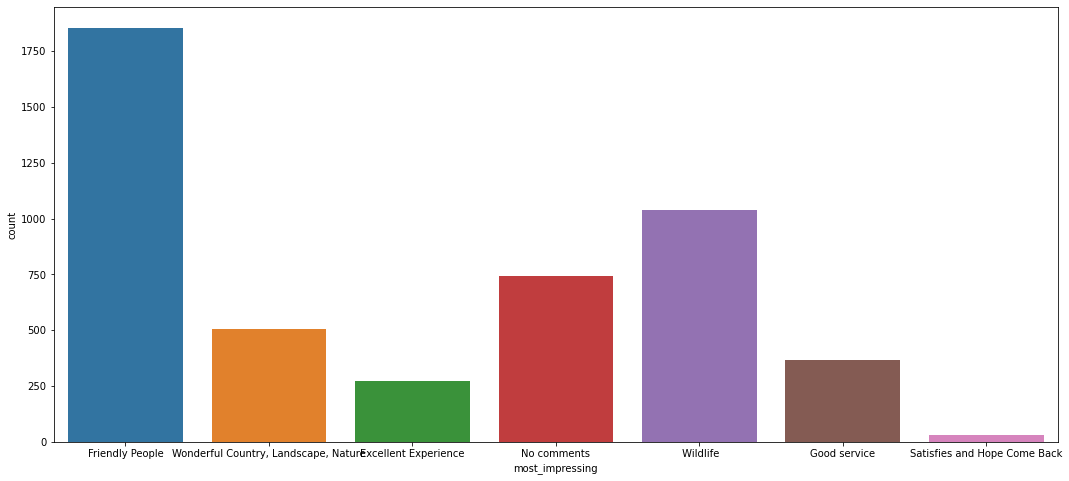

In [60]:
plt.figure(figsize=(18,8))
sns.countplot(data = data, x = 'most_impressing')

### 18.Package_Transport_int

In [61]:
data.package_transport_int.value_counts()

No     3357
Yes    1452
Name: package_transport_int, dtype: int64

<AxesSubplot:xlabel='package_transport_int', ylabel='count'>

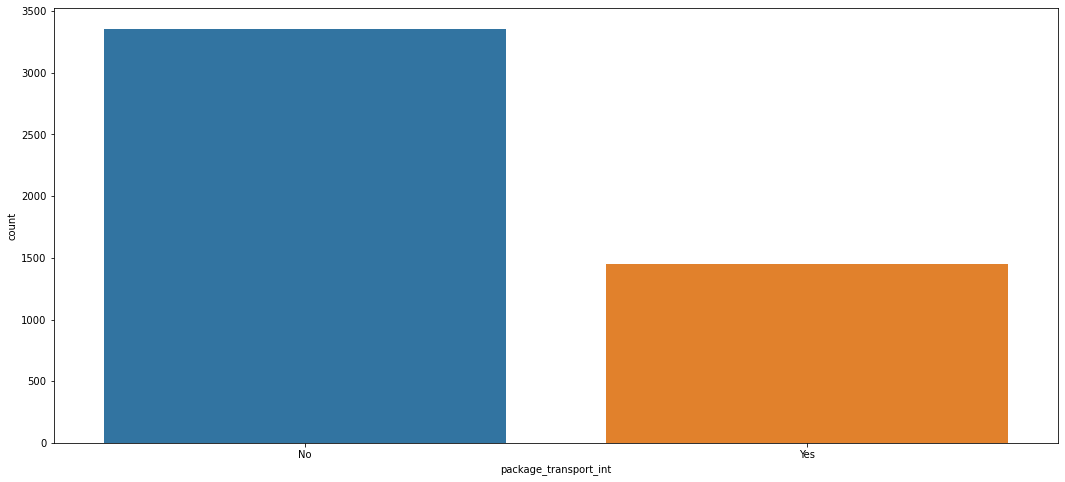

In [62]:
plt.figure(figsize=(18,8))
sns.countplot(data = data, x = 'package_transport_int')

### 19.Tour_Arrangement

In [63]:
data.tour_arrangement.value_counts()

Independent     2570
Package Tour    2239
Name: tour_arrangement, dtype: int64

<AxesSubplot:xlabel='tour_arrangement', ylabel='count'>

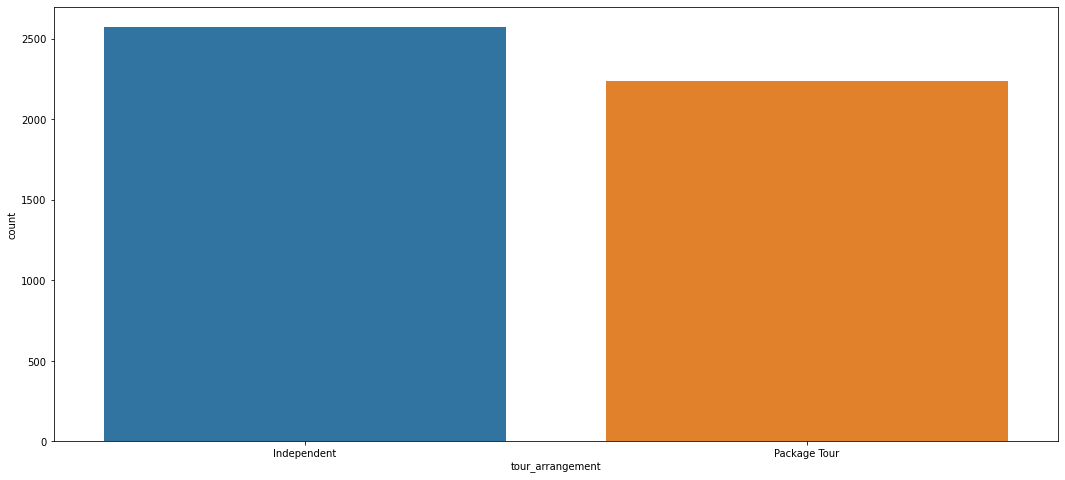

In [64]:
plt.figure(figsize=(18,8))
sns.countplot(data = data, x = 'tour_arrangement')

### 20.Package_Accomodation

In [65]:
data.package_accomodation.value_counts()

No     2602
Yes    2207
Name: package_accomodation, dtype: int64

<AxesSubplot:xlabel='package_accomodation', ylabel='count'>

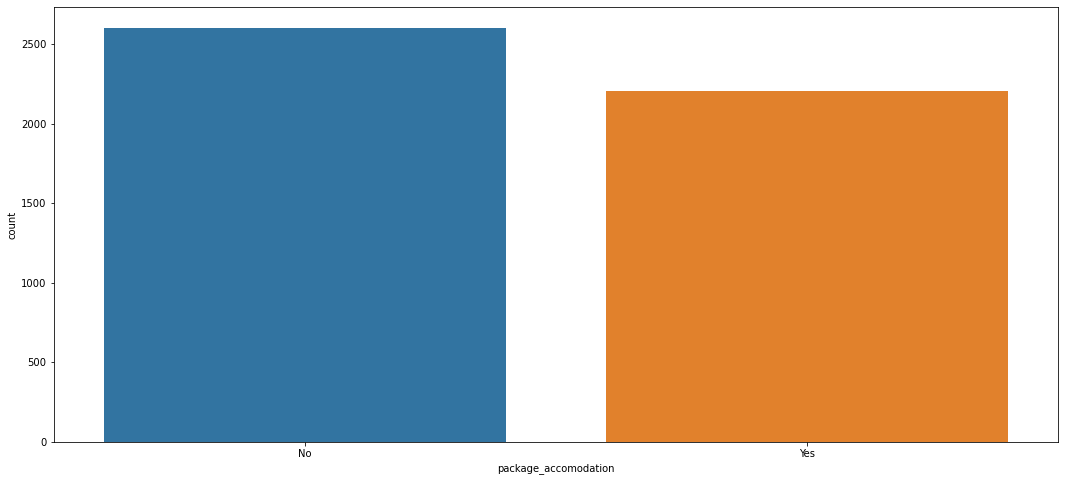

In [66]:
plt.figure(figsize=(18,8))
sns.countplot(data = data, x = 'package_accomodation')

### REPLACING NAME of AGE_GROUP FOR CONVENIENCE

In [67]:
data['age_group'] = data['age_group'].replace('25-44', 'young_age')
data['age_group'] = data['age_group'].replace('45-64', 'middle_age')
data['age_group'] = data['age_group'].replace('Jan-24', 'early_age')
data['age_group'] = data['age_group'].replace('65+', 'old_age')

In [68]:
data.age_group.value_counts()

young_age     2487
middle_age    1391
early_age      624
old_age        307
Name: age_group, dtype: int64

In [69]:
data.head(10)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,middle_age,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13,0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,young_age,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14,7,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,young_age,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1,31,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,young_age,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11,0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,early_age,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7,4,Cash,Yes,No comments,1657500.0
5,tour_1005,UNITED KINGDOM,young_age,Alone,0.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,No,No,No,Yes,Yes,No,9,3,Cash,Yes,Wildlife,120950.0
6,tour_1007,SOUTH AFRICA,middle_age,Alone,0.0,1.0,Business,Mountain climbing,"Friends, relatives",Independent,No,No,No,No,No,No,No,9,0,Cash,Yes,Friendly People,466140.0
7,tour_1008,UNITED STATES OF AMERICA,middle_age,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Friendly People,3480750.0
8,tour_101,NIGERIA,young_age,Alone,0.0,1.0,Leisure and Holidays,Cultural tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,4,0,Cash,Yes,Friendly People,994500.0
9,tour_1011,INDIA,young_age,Alone,1.0,0.0,Business,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,5,0,Credit Card,Yes,Friendly People,2486250.0


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            4809 non-null   object 
 4   total_female           4809 non-null   float64
 5   total_male             4809 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

### STATISTICAL TEST

### PERFORMING "ANNOVA" AND "TUKEY- HSD" ON CATEGORICAL v/s CONTINUOUS FEATURES

In [71]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [72]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### 1.AGE_GROUP

In [75]:
annova=ols('total_cost ~ age_group',data=data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                 sum_sq      df          F  PR(>F)
age_group  2.833165e+16     3.0  185.22693     0.0
Residual   2.449852e+17  4805.0        NaN     NaN


In [76]:
tukey = pairwise_tukeyhsd(data.total_cost,data.age_group,alpha=0.05)
print (tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
  group1     group2      meandiff   p-adj      lower         upper     reject
-----------------------------------------------------------------------------
 early_age middle_age  4435173.7817    0.0  3551023.0337  5319324.5297   True
 early_age    old_age  8866575.5614    0.0  7587317.9454 10145833.1774   True
 early_age  young_age   818984.7094 0.0511     -2622.935  1640592.3538  False
middle_age    old_age  4431401.7798    0.0  3274275.5361  5588528.0234   True
middle_age  young_age -3616189.0723    0.0 -4230583.2593 -3001794.8853   True
   old_age  young_age  -8047590.852    0.0 -9157661.8948 -6937519.8093   True
-----------------------------------------------------------------------------


In [77]:
data['age_group'].replace({'young_age': 'early_age'},inplace = True)

In [78]:
tukey = pairwise_tukeyhsd(data.total_cost,data.age_group,alpha=0.05)
print (tukey)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj    lower        upper     reject
-------------------------------------------------------------------------
 early_age middle_age 3780459.8722   0.0 3240202.6984  4320717.046   True
 early_age    old_age  8211861.652   0.0 7209837.4678 9213885.8362   True
middle_age    old_age 4431401.7798   0.0 3375198.6311 5487604.9284   True
-------------------------------------------------------------------------


### 2.travel_with

In [79]:
annova=ols('total_cost ~ travel_with',data=data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                   sum_sq      df         F  PR(>F)
travel_with  6.199290e+16     4.0  352.3192     0.0
Residual     2.113239e+17  4804.0       NaN     NaN


In [80]:
tukey = pairwise_tukeyhsd(data.total_cost,data.travel_with,alpha=0.05)
print (tukey)

                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
      group1             group2          meandiff   p-adj      lower         upper     reject
---------------------------------------------------------------------------------------------
            Alone            Children  5627790.5272    0.0  4158208.1261  7097372.9283   True
            Alone   Friends/Relatives  4670883.6186    0.0  3961180.1348  5380587.1023   True
            Alone              Spouse  7139650.1642    0.0  6458753.4107  7820546.9178   True
            Alone Spouse and Children 10432448.4637    0.0  9418643.2097 11446253.7177   True
         Children   Friends/Relatives  -956906.9086 0.4403 -2502214.0334   588400.2161  False
         Children              Spouse   1511859.637 0.0552   -20431.2831  3044150.5572  False
         Children Spouse and Children  4804657.9365    0.0  3098171.4385  6511144.4345   True
Friends/Relatives              Spouse  2468766.5457    0.0  

In [81]:
data['travel_with'].replace({'Friends/Relatives': 'Children'},inplace = True)
data['travel_with'].replace({'Spouse': 'Children'},inplace = True)

In [82]:
tukey = pairwise_tukeyhsd(data.total_cost,data.travel_with,alpha=0.05)
print (tukey)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
 group1         group2          meandiff   p-adj    lower         upper     reject
----------------------------------------------------------------------------------
   Alone            Children  5949316.8376   0.0 5478359.6083  6420274.0668   True
   Alone Spouse and Children 10432448.4637   0.0 9555668.0653 11309228.8621   True
Children Spouse and Children  4483131.6261   0.0 3597368.6371  5368894.6152   True
----------------------------------------------------------------------------------


### 3.total_female

In [83]:
annova=ols('total_cost ~ total_female',data=data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df          F  PR(>F)
total_female  2.460094e+16     1.0  475.46907     0.0
Residual      2.487159e+17  4807.0        NaN     NaN


In [84]:
tukey = pairwise_tukeyhsd(data.total_cost,data.total_female,alpha=0.05)
print (tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
group1 group2    meandiff   p-adj      lower          upper     reject
----------------------------------------------------------------------
   0.0    1.0  4736128.0005   -0.0   3999035.8993  5473220.1017   True
   0.0    2.0  7785952.7434   -0.0   6569036.7395  9002868.7474   True
   0.0    3.0 10887924.4339   -0.0   8875705.8576 12900143.0102   True
   0.0    4.0  8980680.3139   -0.0   5518013.9813 12443346.6464   True
   0.0    5.0  8966572.0693    0.0   4298428.5829 13634715.5557   True
   0.0    6.0 10201325.9117    0.0   4192592.8341 16210058.9893   True
   0.0    7.0  8087050.5117 0.0161    738818.7391 15435282.2843   True
   0.0    9.0 10694306.9367 0.1077   -903489.2599 22292103.1333  False
   0.0   10.0 11260307.5617 0.0674   -337488.6349 22858103.7583  False
   0.0   11.0  3530168.3117 0.9998  -9857810.2169 16918146.8403  False
   0.0   12.0 13647663.8117 0.0407    259685.2831 27035642.3403   True
   0.0

In [85]:
data['total_female'].replace({9.0: 0.0},inplace = True)
data['total_female'].replace({10.0: 0.0},inplace = True)
data['total_female'].replace({11.0: 0.0},inplace = True)
data['total_female'].replace({15.0: 0.0},inplace = True)
data['total_female'].replace({49.0: 0.0},inplace = True)

In [86]:
tukey = pairwise_tukeyhsd(data.total_cost,data.total_female,alpha=0.05)
print (tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
group1 group2    meandiff   p-adj      lower          upper     reject
----------------------------------------------------------------------
   0.0    1.0  4653062.7861   -0.0   3970554.0375  5335571.5347   True
   0.0    2.0  7702887.5291   -0.0   6574448.7259  8831326.3323   True
   0.0    3.0 10804859.2195   -0.0   8937946.5652 12671771.8739   True
   0.0    4.0  8897615.0995   -0.0   5684340.7136 12110889.4854   True
   0.0    5.0  8883506.8549    0.0    4551375.513 13215638.1969   True
   0.0    6.0 10118260.6973    0.0   4541909.0786 15694612.3161   True
   0.0    7.0  8003985.2973 0.0084   1184445.9697  14823524.625   True
   0.0   12.0 13564598.5973 0.0204   1139661.9175 25989535.2772   True
   1.0    2.0   3049824.743   -0.0   1959194.3593  4140455.1266   True
   1.0    3.0  6151796.4334   -0.0   4307490.7754  7996102.0914   True
   1.0    4.0  4244552.3134 0.0013   1044359.6972  7444744.9295   True
   1.0

In [87]:
data['total_female'].replace({5.0: 1.0},inplace = True)
data['total_female'].replace({6.0: 1.0},inplace = True)
data['total_female'].replace({7.0: 1.0},inplace = True)
data['total_female'].replace({12.0: 1.0},inplace = True)

In [88]:
tukey = pairwise_tukeyhsd(data.total_cost,data.total_female,alpha=0.05)
print (tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
group1 group2    meandiff   p-adj      lower         upper     reject
---------------------------------------------------------------------
   0.0    1.0  4753298.3977    0.0  4154432.5996  5352164.1958   True
   0.0    2.0  7702887.5291    0.0  6708364.7344  8697410.3238   True
   0.0    3.0 10804859.2195    0.0  9159499.9983 12450218.4408   True
   0.0    4.0  8897615.0995    0.0  6065671.8755 11729558.3235   True
   1.0    2.0  2949589.1314    0.0  1990042.2136  3909136.0493   True
   1.0    3.0  6051560.8219    0.0   4427103.477  7676018.1668   True
   1.0    4.0  4144316.7018 0.0006  1324466.1522  6964167.2515   True
   2.0    3.0  3101971.6905    0.0   1293851.946  4910091.4349   True
   2.0    4.0  1194727.5704 0.7998 -1734776.2216  4124231.3624  False
   3.0    4.0   -1907244.12 0.4835 -5116624.7215  1302136.4814  False
---------------------------------------------------------------------


In [89]:
data['total_female'].replace({2.0: 4.0},inplace = True)
data['total_female'].replace({3.0: 4.0},inplace = True)

In [90]:
tukey = pairwise_tukeyhsd(data.total_cost,data.total_female,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper     reject
-----------------------------------------------------------------
   0.0    1.0 4753298.3977   0.0 4237714.4409 5268882.3544   True
   0.0    4.0 8471097.9298   0.0 7718871.9562 9223323.9034   True
   1.0    4.0 3717799.5321   0.0 3000035.0377 4435564.0266   True
-----------------------------------------------------------------


### 4.total_male

In [91]:
annova=ols('total_cost ~ total_male',data=data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq      df          F  PR(>F)
total_male  9.498003e+15     1.0  173.06157     0.0
Residual    2.638188e+17  4807.0        NaN     NaN


In [92]:
tukey = pairwise_tukeyhsd(data.total_cost,data.total_male,alpha=0.05)
print (tukey)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
group1 group2    meandiff    p-adj      lower          upper     reject
-----------------------------------------------------------------------
   0.0    1.0   1479222.9701    0.0    623002.4299  2335443.5102   True
   0.0    2.0   4558817.0896   -0.0   3220704.1451  5896930.0341   True
   0.0    3.0   8423076.3658   -0.0   6217417.2458 10628735.4858   True
   0.0    4.0   6930728.2504    0.0   3238964.3958  10622492.105   True
   0.0    5.0   6298467.8728 0.0571    -81244.0269 12678179.7726  False
   0.0    6.0   8766138.7689 0.0001   2768243.1892 14764034.3486   True
   0.0    7.0  10636075.9895 0.7328  -6736624.0511 28008776.0301  False
   0.0    9.0   1548312.7395    1.0 -15824387.3011 18921012.7801  False
   0.0   10.0   7666562.7395 0.9712  -9706137.3011 25039262.7801  False
   0.0   12.0  -3770187.2605    1.0 -28328107.6948 20787733.1738  False
   0.0   15.0   6946681.4895 0.9877 -10426018.5511 24319381.5301

In [93]:
data['total_male'].replace({5.0: 0.0},inplace = True)
data['total_male'].replace({7.0: 0.0},inplace = True)
data['total_male'].replace({9.0: 0.0},inplace = True)
data['total_male'].replace({12.0: 0.0},inplace = True)
data['total_male'].replace({15.0: 0.0},inplace = True)
data['total_male'].replace({17.0: 0.0},inplace = True)
data['total_male'].replace({44.0: 0.0},inplace = True)
data['total_male'].replace({10.0: 0.0},inplace = True)

In [94]:
tukey = pairwise_tukeyhsd(data.total_cost,data.total_male,alpha=0.05)
print (tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
group1 group2    meandiff   p-adj      lower         upper     reject
---------------------------------------------------------------------
   0.0    1.0  1343151.4226    0.0   620201.0669  2066101.7783   True
   0.0    2.0  4422745.5421   -0.0  3287442.1124  5558048.9718   True
   0.0    3.0  8287004.8184   -0.0  6411709.3696 10162300.2671   True
   0.0    4.0  6794656.7029    0.0  3653382.5401  9935930.8657   True
   0.0    6.0  8630067.2214    0.0  3525156.5073 13734977.9356   True
   1.0    2.0  3079594.1195   -0.0  2049697.7796  4109490.4594   True
   1.0    3.0  6943853.3958   -0.0  5130429.6688  8757277.1228   True
   1.0    4.0  5451505.2803    0.0  2346770.8377  8556239.7229   True
   1.0    6.0  7286915.7989 0.0006   2204407.954 12369423.6437   True
   2.0    3.0  3864259.2762    0.0  1850615.2475   5877903.305   True
   2.0    4.0  2371911.1608 0.2893   -853865.121  5597687.4426  False
   2.0    6.0  42073

In [95]:
data['total_male'].replace({4.0: 2.0},inplace = True)
data['total_male'].replace({6.0: 2.0},inplace = True)

In [96]:
tukey = pairwise_tukeyhsd(data.total_cost,data.total_male,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper     reject
-----------------------------------------------------------------
   0.0    1.0 1343151.4226   0.0  690947.0713 1995355.7739   True
   0.0    2.0 4756631.6455   0.0 3775600.0684 5737663.2226   True
   0.0    3.0 8287004.8184   0.0 6595220.8085 9978788.8282   True
   1.0    2.0 3413480.2229   0.0 2532187.1465 4294773.2994   True
   1.0    3.0 6943853.3958   0.0 5307886.5051 8579820.2864   True
   2.0    3.0 3530373.1728   0.0  1737766.103 5322980.2426   True
-----------------------------------------------------------------


### 5.purpose

In [97]:
annova=ols('total_cost ~ purpose',data=data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                sum_sq      df          F  PR(>F)
purpose   6.464900e+16     6.0  247.95746     0.0
Residual  2.086678e+17  4802.0        NaN     NaN


In [98]:
tukey = pairwise_tukeyhsd(data.total_cost,data.purpose,alpha=0.05)
print (tukey)

                                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                                  
            group1                         group2                meandiff   p-adj      lower          upper     reject
----------------------------------------------------------------------------------------------------------------------
                      Business           Leisure and Holidays  8041370.5799   -0.0   7206784.7437   8875956.416   True
                      Business        Meetings and Conference    736865.168  0.662   -595472.2566  2069202.5926  False
                      Business                          Other  -329673.0819 0.9986  -2205026.6975  1545680.5336  False
                      Business        Scientific and Academic  1479788.5181  0.434   -735803.2442  3695380.2805  False
                      Business Visiting Friends and Relatives  1021539.3046 0.0764     -55798.019  2098876.6282  False
                      Business                  

In [99]:
data['purpose'].replace({'Meetings and Conference': 'Business'},inplace = True)
data['purpose'].replace({'Other': 'Business'},inplace = True)
data['purpose'].replace({'Scientific and Academic': 'Business'},inplace = True)
data['purpose'].replace({'Visiting Friends and Relatives': 'Business'},inplace = True)

In [100]:
tukey = pairwise_tukeyhsd(data.total_cost,data.purpose,alpha=0.05)
print (tukey)

                       Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
       group1               group2           meandiff   p-adj      lower         upper     reject
-------------------------------------------------------------------------------------------------
            Business Leisure and Holidays  7515384.9115    0.0  7051806.6993  7978963.1236   True
            Business         Volunteering  1524075.9732 0.0242     158673.87  2889478.0763   True
Leisure and Holidays         Volunteering -5991308.9383    0.0 -7339604.3551 -4643013.5215   True
-------------------------------------------------------------------------------------------------


### 6.main_activity

In [101]:
annova=ols('total_cost ~ main_activity',data=data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                     sum_sq      df         F  PR(>F)
main_activity  2.970015e+16     8.0  73.14807     0.0
Residual       2.436167e+17  4800.0       NaN     NaN


In [102]:
tukey = pairwise_tukeyhsd(data.total_cost,data.main_activity,alpha=0.05)
print (tukey)

                           Multiple Comparison of Means - Tukey HSD, FWER=0.05                            
         group1                   group2             meandiff   p-adj      lower          upper     reject
----------------------------------------------------------------------------------------------------------
           Beach tourism            Bird watching -3382594.3751 0.1049  -7082033.2571   316844.5068  False
           Beach tourism       Conference tourism  1910161.9868 0.0004    565351.6272  3254972.3463   True
           Beach tourism         Cultural tourism -2699507.0754    0.0  -4055305.9879 -1343708.1629   True
           Beach tourism Diving and Sport Fishing  3589074.1074  0.679  -2581157.4279  9759305.6426  False
           Beach tourism          Hunting tourism -4760660.1839   -0.0  -6004144.9303 -3517175.4374   True
           Beach tourism        Mountain climbing -4634479.4106   -0.0  -6236172.8504 -3032785.9708   True
           Beach tourism         Wild

In [103]:
data['main_activity'].replace({'Bird watching': 'Beach tourism'},inplace = True)
data['main_activity'].replace({'Diving and Sport Fishing': 'Beach tourism'},inplace = True)
data['main_activity'].replace({'business': 'Beach tourism'},inplace = True)

In [104]:
tukey = pairwise_tukeyhsd(data.total_cost,data.main_activity,alpha=0.05)
print (tukey)

                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
      group1             group2          meandiff   p-adj      lower         upper     reject
---------------------------------------------------------------------------------------------
     Beach tourism Conference tourism  1978032.3605 0.0001   757099.1033  3198965.6178   True
     Beach tourism   Cultural tourism -2631636.7016    0.0 -3862802.4185 -1400470.9847   True
     Beach tourism    Hunting tourism -4692789.8101   -0.0 -5819260.2207 -3566319.3995   True
     Beach tourism  Mountain climbing -4566609.0368   -0.0 -6026282.3059 -3106935.7677   True
     Beach tourism   Wildlife tourism  2177149.2418   -0.0  1437119.5711  2917178.9125   True
Conference tourism   Cultural tourism -4609669.0621   -0.0 -6118645.0716 -3100693.0527   True
Conference tourism    Hunting tourism -6670822.1706   -0.0 -8095664.3236 -5245980.0177   True
Conference tourism  Mountain climbing -6544641.3974   -0.0 -

In [105]:
data['main_activity'].replace({'Wildlife tourism': 'Conference tourism'},inplace = True)

In [106]:
tukey = pairwise_tukeyhsd(data.total_cost,data.main_activity,alpha=0.05)
print (tukey)

                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
      group1             group2          meandiff   p-adj      lower         upper     reject
---------------------------------------------------------------------------------------------
     Beach tourism Conference tourism  2149321.4065    0.0  1457758.2152  2840884.5979   True
     Beach tourism   Cultural tourism -2631636.7016    0.0 -3810002.8426 -1453270.5606   True
     Beach tourism    Hunting tourism -4692789.8101    0.0  -5770950.591 -3614629.0292   True
     Beach tourism  Mountain climbing -4566609.0368    0.0 -5963682.9918 -3169535.0819   True
Conference tourism   Cultural tourism -4780958.1081    0.0 -5875760.1665 -3686156.0498   True
Conference tourism    Hunting tourism -6842111.2166    0.0 -7828252.9175 -5855969.5157   True
Conference tourism  Mountain climbing -6715930.4434    0.0 -8043281.3466 -5388579.5401   True
  Cultural tourism    Hunting tourism -2061153.1085 0.0004  

In [107]:
data['main_activity'].replace({'Mountain climbing': 'Hunting tourism'},inplace = True)

In [108]:
tukey = pairwise_tukeyhsd(data.total_cost,data.main_activity,alpha=0.05)
print (tukey)

                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
      group1             group2          meandiff   p-adj      lower         upper     reject
---------------------------------------------------------------------------------------------
     Beach tourism Conference tourism  2149321.4065    0.0  1498087.8022  2800555.0109   True
     Beach tourism   Cultural tourism -2631636.7016    0.0 -3741284.5817 -1521988.8215   True
     Beach tourism    Hunting tourism -4650059.9969    0.0 -5534404.3231 -3765715.6706   True
Conference tourism   Cultural tourism -4780958.1081    0.0 -5811915.0756 -3750001.1407   True
Conference tourism    Hunting tourism -6799381.4034    0.0 -7582719.6051 -6016043.2017   True
  Cultural tourism    Hunting tourism -2018423.2953 0.0001 -3210409.8508  -826436.7397   True
---------------------------------------------------------------------------------------------


### 7.info_source

In [109]:
annova=ols('total_cost ~ info_source',data=data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                   sum_sq      df          F  PR(>F)
info_source  4.551514e+16     7.0  137.03534     0.0
Residual     2.278017e+17  4801.0        NaN     NaN


In [110]:
tukey = pairwise_tukeyhsd(data.total_cost,data.info_source,alpha=0.05)
print (tukey)

                                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                                  
            group1                         group2                meandiff   p-adj      lower          upper     reject
----------------------------------------------------------------------------------------------------------------------
            Friends, relatives Newspaper, magazines,brochures  1652413.3081  0.001    435022.0935  2869804.5227   True
            Friends, relatives                 Radio, TV, Web  1936398.8406  0.001    515524.7787  3357272.9025   True
            Friends, relatives        Tanzania Mission Abroad  -656085.1681 0.9946  -3241127.6123   1928957.276  False
            Friends, relatives                     Trade fair    726957.376 0.9857  -1708728.7828  3162643.5347  False
            Friends, relatives   Travel, agent, tour operator  6590646.2057   -0.0   5887170.4557  7294121.9557   True
            Friends, relatives             infli

In [111]:
data['info_source'].replace({'Tanzania Mission Abroad': 'Friends, relatives'},inplace = True)
data['info_source'].replace({'Trade fair': 'Friends, relatives'},inplace = True)
data['info_source'].replace({'inflight magazines': 'Friends, relatives'},inplace = True)
data['info_source'].replace({'others': 'Friends, relatives'},inplace = True)

In [112]:
tukey = pairwise_tukeyhsd(data.total_cost,data.info_source,alpha=0.05)
print (tukey)

                                Multiple Comparison of Means - Tukey HSD, FWER=0.05                                
            group1                         group2               meandiff   p-adj      lower        upper     reject
-------------------------------------------------------------------------------------------------------------------
            Friends, relatives Newspaper, magazines,brochures 1599158.4187 0.0003   594358.6694  2603958.168   True
            Friends, relatives                 Radio, TV, Web 1883143.9512 0.0002   701979.5981 3064308.3044   True
            Friends, relatives   Travel, agent, tour operator 6537391.3163    0.0  5989027.7056 7085754.9271   True
Newspaper, magazines,brochures                 Radio, TV, Web  283985.5325 0.9591 -1175778.5496 1743749.6147  False
Newspaper, magazines,brochures   Travel, agent, tour operator 4938232.8976    0.0  3920163.8449 5956301.9503   True
                Radio, TV, Web   Travel, agent, tour operator 4654247.36

In [113]:
data['info_source'].replace({'Radio, TV, Web': 'Newspaper, magazines,brochures'},inplace = True)

In [114]:
tukey = pairwise_tukeyhsd(data.total_cost,data.info_source,alpha=0.05)
print (tukey)

                               Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
            group1                         group2               meandiff   p-adj    lower        upper     reject
-----------------------------------------------------------------------------------------------------------------
            Friends, relatives Newspaper, magazines,brochures 1715461.7042   0.0  978781.6629 2452141.7456   True
            Friends, relatives   Travel, agent, tour operator 6537391.3163   0.0 6037183.7342 7037598.8984   True
Newspaper, magazines,brochures   Travel, agent, tour operator 4821929.6121   0.0 4070243.4195 5573615.8047   True
-----------------------------------------------------------------------------------------------------------------


### 8.tour_arrangement

In [115]:
annova=ols('total_cost ~ tour_arrangement',data=data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                        sum_sq      df           F  PR(>F)
tour_arrangement  9.026114e+16     1.0  2370.23653     0.0
Residual          1.830557e+17  4807.0         NaN     NaN


In [116]:
tukey = pairwise_tukeyhsd(data.total_cost,data.tour_arrangement,alpha=0.05)
print (tukey)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
   group1      group2      meandiff   p-adj    lower        upper     reject
----------------------------------------------------------------------------
Independent Package Tour 8685287.1076  -0.0 8335546.7158 9035027.4994   True
----------------------------------------------------------------------------


### 9.package_transport_int

In [117]:
annova=ols('total_cost ~ package_transport_int',data=data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                             sum_sq      df           F  PR(>F)
package_transport_int  6.986236e+16     1.0  1650.63141     0.0
Residual               2.034545e+17  4807.0         NaN     NaN


In [118]:
tukey = pairwise_tukeyhsd(data.total_cost,data.package_transport_int,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper    reject
----------------------------------------------------------------
    No    Yes 8302139.3914  -0.0 7901528.8018 8702749.981   True
----------------------------------------------------------------


### 10.package_accomodation

In [119]:
annova=ols('total_cost ~ package_accomodation',data=data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                            sum_sq      df           F  PR(>F)
package_accomodation  8.819222e+16     1.0  2290.02497     0.0
Residual              1.851246e+17  4807.0         NaN     NaN


In [120]:
tukey = pairwise_tukeyhsd(data.total_cost,data.package_accomodation,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper     reject
-----------------------------------------------------------------
    No    Yes 8593848.7012  -0.0 8241781.9192 8945915.4833   True
-----------------------------------------------------------------


### 11.package_food

In [121]:
annova=ols('total_cost ~ package_food',data=data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df           F  PR(>F)
package_food  7.777952e+16     1.0  1912.09632     0.0
Residual      1.955373e+17  4807.0         NaN     NaN


In [122]:
tukey = pairwise_tukeyhsd(data.total_cost,data.package_food,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper     reject
-----------------------------------------------------------------
    No    Yes 8126670.7211  -0.0 7762323.6887 8491017.7535   True
-----------------------------------------------------------------


### 12.package_transport_tz

In [123]:
annova=ols('total_cost ~ package_transport_tz',data=data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                            sum_sq      df           F  PR(>F)
package_transport_tz  7.665663e+16     1.0  1873.73163     0.0
Residual              1.966602e+17  4807.0         NaN     NaN


In [124]:
tukey = pairwise_tukeyhsd(data.total_cost,data.package_transport_tz,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper     reject
-----------------------------------------------------------------
    No    Yes 8174370.2616  -0.0 7804151.8038 8544588.7194   True
-----------------------------------------------------------------


### 13.package_sightseeing

In [125]:
annova=ols('total_cost ~ package_sightseeing',data=data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                           sum_sq      df           F  PR(>F)
package_sightseeing  6.313990e+16     1.0  1444.08577     0.0
Residual             2.101769e+17  4807.0         NaN     NaN


In [126]:
tukey = pairwise_tukeyhsd(data.total_cost,data.package_sightseeing,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper     reject
-----------------------------------------------------------------
    No    Yes 7835786.2203  -0.0 7431542.2593 8240030.1814   True
-----------------------------------------------------------------


### 14.package_guided_tour

In [127]:
annova=ols('total_cost ~ package_guided_tour',data=data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                           sum_sq      df           F  PR(>F)
package_guided_tour  5.842676e+16     1.0  1306.98188     0.0
Residual             2.148901e+17  4807.0         NaN     NaN


In [128]:
tukey = pairwise_tukeyhsd(data.total_cost,data.package_guided_tour,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper     reject
-----------------------------------------------------------------
    No    Yes 7458049.3714  -0.0 7053615.1214 7862483.6213   True
-----------------------------------------------------------------


### 15.package_insurance

In [129]:
annova=ols('total_cost ~ package_insurance',data=data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                         sum_sq      df          F  PR(>F)
package_insurance  2.887238e+16     1.0  567.77538     0.0
Residual           2.444444e+17  4807.0        NaN     NaN


In [130]:
tukey = pairwise_tukeyhsd(data.total_cost,data.package_insurance,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper     reject
-----------------------------------------------------------------
    No    Yes 6828580.1498  -0.0 6266757.0551 7390403.2444   True
-----------------------------------------------------------------


### 16.night_mainland

In [131]:
annova=ols('total_cost ~ night_mainland',data=data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                      sum_sq      df        F   PR(>F)
night_mainland  1.667585e+14     1.0  2.93468  0.08676
Residual        2.731501e+17  4807.0      NaN      NaN


In [132]:
tukey = pairwise_tukeyhsd(data.total_cost,data.night_mainland,alpha=0.05)
print (tukey)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
group1 group2    meandiff    p-adj      lower          upper     reject
-----------------------------------------------------------------------
     0      1  -6985112.0466    0.0   -9369874.708 -4600349.3852   True
     0      2  -7213590.2347    0.0  -9082634.0744 -5344546.3951   True
     0      3  -5821786.9118    0.0  -7730039.3481 -3913534.4755   True
     0      4  -3495269.7137    0.0  -5426591.0972 -1563948.3301   True
     0      5  -2278356.4618 0.0056  -4293877.8642  -262835.0594   True
     0      6     146474.069    1.0  -1821082.1378  2114030.2758  False
     0      7    786014.6607    1.0  -1096838.7312  2668868.0527  False
     0      9   1373303.7781  0.994  -1024652.9068  3771260.4631  False
     0     10    -97035.3568    1.0  -2118299.2357  1924228.5221  False
     0     11     31821.6109    1.0  -2782136.6931  2845779.9149  False
     0     12    654677.6139    1.0  -1829921.9967  3139277.2245

In [133]:
data['night_mainland'].replace({6: 0},inplace = True)
data['night_mainland'].replace({7: 0},inplace = True)
data['night_mainland'].replace({9: 0},inplace = True)
data['night_mainland'].replace({10: 0},inplace = True)
data['night_mainland'].replace({12: 0},inplace = True)
data['night_mainland'].replace({15: 0},inplace = True)
data['night_mainland'].replace({13: 0},inplace = True)
data['night_mainland'].replace({14: 0},inplace = True)
data['night_mainland'].replace({16: 0},inplace = True)
data['night_mainland'].replace({17: 0},inplace = True)
data['night_mainland'].replace({19: 0},inplace = True)
data['night_mainland'].replace({20: 0},inplace = True)
data['night_mainland'].replace({23: 0},inplace = True)
data['night_mainland'].replace({24: 0},inplace = True)
data['night_mainland'].replace({25: 0},inplace = True)
data['night_mainland'].replace({26: 0},inplace = True)
data['night_mainland'].replace({27: 0},inplace = True)
data['night_mainland'].replace({29: 0},inplace = True)
data['night_mainland'].replace({31: 0},inplace = True)
data['night_mainland'].replace({32: 0},inplace = True)
data['night_mainland'].replace({33: 0},inplace = True)
data['night_mainland'].replace({34: 0},inplace = True)
data['night_mainland'].replace({35: 0},inplace = True)
data['night_mainland'].replace({36: 0},inplace = True)
data['night_mainland'].replace({37: 0},inplace = True)
data['night_mainland'].replace({39: 0},inplace = True)
data['night_mainland'].replace({40: 0},inplace = True)
data['night_mainland'].replace({41: 0},inplace = True)
data['night_mainland'].replace({42: 0},inplace = True)
data['night_mainland'].replace({43: 0},inplace = True)
data['night_mainland'].replace({45: 0},inplace = True)
data['night_mainland'].replace({47: 0},inplace = True)
data['night_mainland'].replace({49: 0},inplace = True)
data['night_mainland'].replace({50: 0},inplace = True)
data['night_mainland'].replace({51: 0},inplace = True)
data['night_mainland'].replace({53: 0},inplace = True)
data['night_mainland'].replace({54: 0},inplace = True)
data['night_mainland'].replace({55: 0},inplace = True)
data['night_mainland'].replace({56: 0},inplace = True)
data['night_mainland'].replace({59: 0},inplace = True)
data['night_mainland'].replace({60: 0},inplace = True)
data['night_mainland'].replace({61: 0},inplace = True)
data['night_mainland'].replace({63: 0},inplace = True)
data['night_mainland'].replace({64: 0},inplace = True)
data['night_mainland'].replace({69: 0},inplace = True)
data['night_mainland'].replace({70: 0},inplace = True)
data['night_mainland'].replace({75: 0},inplace = True)
data['night_mainland'].replace({90: 0},inplace = True)
data['night_mainland'].replace({120: 0},inplace = True)
data['night_mainland'].replace({130: 0},inplace = True)
data['night_mainland'].replace({145: 0},inplace = True)
data['night_mainland'].replace({11: 0},inplace = True)
data['night_mainland'].replace({22: 0},inplace = True)
data['night_mainland'].replace({46: 0},inplace = True)
data['night_mainland'].replace({65: 0},inplace = True)
data['night_mainland'].replace({66: 0},inplace = True)

In [134]:
tukey = pairwise_tukeyhsd(data.total_cost,data.night_mainland,alpha=0.05)
print (tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
group1 group2    meandiff   p-adj      lower         upper     reject
---------------------------------------------------------------------
     0      1 -6865944.0191   -0.0 -8429034.8183 -5302853.2198   True
     0      2 -7094422.2072   -0.0 -8204176.5275 -5984667.8869   True
     0      3 -5702618.8843   -0.0 -6848636.7991 -4556600.9694   True
     0      4 -3376101.6861   -0.0 -4543269.2946 -2208934.0777   True
     0      5 -2159188.4343    0.0 -3402504.5785  -915872.2901   True
     0     21 -4648575.3782 0.0001 -7730195.1532 -1566955.6032   True
     0     30 -3870061.1355 0.0002 -6475552.6417 -1264569.6294   True
     1      2  -228478.1881 0.9999  -2063097.582  1606141.2058  False
     1      3  1163325.1348 0.5511  -693454.5318  3020104.8014  False
     1      4   3489842.333    0.0  1619934.8766  5359749.7893   True
     1      5  4706755.5848   -0.0  2788394.6429  6625116.5267   True
     1     21  22173

In [135]:
data['night_mainland'].replace({2: 1},inplace = True)
data['night_mainland'].replace({3: 1},inplace = True)
data['night_mainland'].replace({21: 1},inplace = True)

In [136]:
tukey = pairwise_tukeyhsd(data.total_cost,data.night_mainland,alpha=0.05)
print (tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
group1 group2    meandiff   p-adj      lower         upper     reject
---------------------------------------------------------------------
     0      1 -6425288.0212    0.0  -7112883.844 -5737692.1984   True
     0      4 -3376101.6861    0.0 -4427447.1333 -2324756.2389   True
     0      5 -2159188.4343    0.0 -3279125.9292 -1039250.9394   True
     0     30 -3870061.1355 0.0001 -6217000.5235 -1523121.7476   True
     1      4  3049186.3351    0.0  1897051.0708  4201321.5994   True
     1      5  4266099.5869    0.0  3051048.8018  5481150.3721   True
     1     30  2555226.8857 0.0296   161440.5734  4949013.1979   True
     4      5  1216913.2518 0.1493  -235287.7137  2669114.2174  False
     4     30  -493959.4494 0.9838 -3016409.0807  2028490.1819  False
     5     30 -1710872.7013 0.3565 -4262673.0237   840927.6212  False
---------------------------------------------------------------------


In [137]:
data['night_mainland'].replace({30: 4},inplace = True)

In [138]:
tukey = pairwise_tukeyhsd(data.total_cost,data.night_mainland,alpha=0.05)
print (tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
group1 group2    meandiff   p-adj      lower         upper     reject
---------------------------------------------------------------------
     0      1 -6425288.0212    0.0 -7072801.5973 -5777774.4452   True
     0      4  -3452180.262    0.0 -4372162.2448 -2532198.2793   True
     0      5 -2159188.4343    0.0 -3213841.0488 -1104535.8197   True
     1      4  2973107.7592    0.0  1951678.6607  3994536.8577   True
     1      5  4266099.5869    0.0  3121878.1521  5410321.0218   True
     4      5  1292991.8277 0.0567   -24709.0903  2610692.7458  False
---------------------------------------------------------------------


### 17.night_zanzibar

In [139]:
annova=ols('total_cost ~ night_zanzibar',data=data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                      sum_sq      df          F  PR(>F)
night_zanzibar  9.722398e+15     1.0  177.30104     0.0
Residual        2.635944e+17  4807.0        NaN     NaN


In [140]:
tukey = pairwise_tukeyhsd(data.total_cost,data.night_zanzibar,alpha=0.05)
print (tukey)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
group1 group2    meandiff    p-adj      lower          upper     reject
-----------------------------------------------------------------------
     0      1  -1804846.2792 0.9992  -5819244.3266  2209551.7682  False
     0      2   1946098.9579 0.4581   -544021.5209  4436219.4367  False
     0      3   3298095.1339    0.0   1517839.1109  5078351.1569   True
     0      4   4841859.4948    0.0   3123704.5713  6560014.4182   True
     0      5     5212763.32    0.0   3321470.9501    7104055.69   True
     0      6   3832160.3839    0.0   1736882.1009  5927438.6668   True
     0      7   4564721.7581    0.0   3039377.1888  6090066.3274   True
     0      9   3319133.2399 0.5704  -1127910.8256  7766177.3053  False
     0     10   4480472.7442 0.0007    940231.2939  8020714.1945   True
     0     11   5129984.8458 0.1235   -411659.1198 10671628.8114  False
     0     12   6107226.5822 0.0315    202722.1727 12011730.9916

In [141]:
data['night_zanzibar'].replace({1: 0},inplace = True)
data['night_zanzibar'].replace({2: 0},inplace = True)
data['night_zanzibar'].replace({9: 0},inplace = True)
data['night_zanzibar'].replace({11: 0},inplace = True)
data['night_zanzibar'].replace({15: 0},inplace = True)
data['night_zanzibar'].replace({13: 0},inplace = True)
data['night_zanzibar'].replace({16: 0},inplace = True)
data['night_zanzibar'].replace({17: 0},inplace = True)
data['night_zanzibar'].replace({19: 0},inplace = True)
data['night_zanzibar'].replace({20: 0},inplace = True)
data['night_zanzibar'].replace({21: 0},inplace = True)
data['night_zanzibar'].replace({22: 0},inplace = True)
data['night_zanzibar'].replace({23: 0},inplace = True)
data['night_zanzibar'].replace({24: 0},inplace = True)
data['night_zanzibar'].replace({25: 0},inplace = True)
data['night_zanzibar'].replace({26: 0},inplace = True)
data['night_zanzibar'].replace({27: 0},inplace = True)
data['night_zanzibar'].replace({30: 0},inplace = True)
data['night_zanzibar'].replace({31: 0},inplace = True)
data['night_zanzibar'].replace({33: 0},inplace = True)
data['night_zanzibar'].replace({35: 0},inplace = True)
data['night_zanzibar'].replace({43: 0},inplace = True)
data['night_zanzibar'].replace({50: 0},inplace = True)
data['night_zanzibar'].replace({60: 0},inplace = True)
data['night_zanzibar'].replace({61: 0},inplace = True)

In [142]:
tukey = pairwise_tukeyhsd(data.total_cost,data.night_zanzibar,alpha=0.05)
print (tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
group1 group2    meandiff   p-adj      lower         upper     reject
---------------------------------------------------------------------
     0      3  3125627.6235    0.0  1677522.5614  4573732.6855   True
     0      4  4669391.9843   -0.0  3272205.8987  6066578.0699   True
     0      5  5040295.8096   -0.0  3501181.8971  6579409.7221   True
     0      6  3659692.8734    0.0  1953478.6374  5365907.1095   True
     0      7  4392254.2477   -0.0  3153268.2404   5631240.255   True
     0     10  4308005.2337 0.0001  1419838.5214  7196171.9461   True
     0     12  5934759.0717 0.0043  1114753.4665 10754764.6769   True
     0     14  7130500.8613    0.0   3920031.741 10340969.9817   True
     3      4  1543764.3608 0.2443  -391736.8908  3479265.6125  False
     3      5  1914668.1861  0.086  -125652.3213  3954988.6936  False
     3      6     534065.25 0.9978 -1635082.7756  2703213.2756  False
     3      7  12666

In [143]:
data['night_zanzibar'].replace({4: 3},inplace = True)
data['night_zanzibar'].replace({5: 3},inplace = True)
data['night_zanzibar'].replace({6: 3},inplace = True)
data['night_zanzibar'].replace({7: 3},inplace = True)
data['night_zanzibar'].replace({10: 3},inplace = True)
data['night_zanzibar'].replace({12: 3},inplace = True)

In [144]:
tukey = pairwise_tukeyhsd(data.total_cost,data.night_zanzibar,alpha=0.05)
print (tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
     0      3 4242918.9136    0.0 3701763.4702 4784074.3569   True
     0     14 7130500.8613    0.0 4703368.9512 9557632.7715   True
     3     14 2887581.9478 0.0159  435917.9047 5339245.9908   True
------------------------------------------------------------------


### 18.payment_mode

In [145]:
annova=ols('total_cost ~ payment_mode',data=data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                    sum_sq      df         F  PR(>F)
payment_mode  4.099583e+15     3.0  24.38984     0.0
Residual      2.692172e+17  4805.0       NaN     NaN


In [146]:
tukey = pairwise_tukeyhsd(data.total_cost,data.payment_mode,alpha=0.05)
print (tukey)

                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
   group1         group2         meandiff   p-adj      lower          upper     reject
--------------------------------------------------------------------------------------
       Cash       Credit Card  2738653.1369    0.0   1911839.0708   3565467.203   True
       Cash             Other -1707985.8523 0.9174  -8515635.2553  5099663.5508  False
       Cash Travellers Cheque  1256852.0299 0.9708  -6019960.7176  8533664.7773  False
Credit Card             Other -4446638.9892   0.34 -11291368.2203  2398090.2419  False
Credit Card Travellers Cheque -1481801.1071 0.9541  -8793314.7406  5829712.5265  False
      Other Travellers Cheque  2964837.8821 0.8701   -6990999.627 12920675.3913  False
--------------------------------------------------------------------------------------


In [147]:
data['payment_mode'].replace({'Other': 'Cash'},inplace = True)
data['payment_mode'].replace({'Travellers Cheque': 'Cash'},inplace = True)

In [148]:
tukey = pairwise_tukeyhsd(data.total_cost,data.payment_mode,alpha=0.05)
print (tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
group1    group2     meandiff   p-adj    lower       upper     reject
---------------------------------------------------------------------
  Cash Credit Card 2739815.2871  -0.0 2109322.264 3370308.3102   True
---------------------------------------------------------------------


### 19.first_trip_tz

In [149]:
annova=ols('total_cost ~ first_trip_tz',data=data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                     sum_sq      df          F  PR(>F)
first_trip_tz  2.400668e+16     1.0  462.87767     0.0
Residual       2.493101e+17  4807.0        NaN     NaN


In [150]:
tukey = pairwise_tukeyhsd(data.total_cost,data.first_trip_tz,alpha=0.05)
print (tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper    reject
----------------------------------------------------------------
    No    Yes 4767866.3247  -0.0 4333407.7135 5202324.936   True
----------------------------------------------------------------


### 20.most_impressing

In [151]:
annova=ols('total_cost ~ most_impressing',data=data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                       sum_sq      df        F  PR(>F)
most_impressing  7.716298e+15     6.0  23.2515     0.0
Residual         2.656005e+17  4802.0      NaN     NaN


In [152]:
tukey = pairwise_tukeyhsd(data.total_cost,data.most_impressing,alpha=0.05)
print (tukey)

                                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                                   
           group1                           group2                   meandiff   p-adj      lower         upper     reject
-------------------------------------------------------------------------------------------------------------------------
                    Wildlife                 Excellent Experience -2316110.8615 0.0001 -3812516.1787  -819705.5442   True
                    Wildlife                      Friendly People -3064664.5115   -0.0 -3915035.3219 -2214293.7011   True
                    Wildlife                         Good service -2664553.6062    0.0 -3999446.6446 -1329660.5678   True
                    Wildlife                          No comments -3473396.6372   -0.0 -4527544.7067 -2419248.5677   True
                    Wildlife         Satisfies and Hope Come Back -3789663.3958 0.0766 -7787932.9562   208606.1645  False
                    Wild

In [153]:
data['most_impressing'].replace({'Satisfies and Hope Come Back': 'Wildlife'},inplace = True)

In [154]:
tukey = pairwise_tukeyhsd(data.total_cost,data.most_impressing,alpha=0.05)
print (tukey)

                               Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
       group1                       group2                   meandiff   p-adj      lower         upper     reject
-----------------------------------------------------------------------------------------------------------------
            Wildlife                 Excellent Experience -2316110.8615 0.0001 -3812516.1787  -819705.5442   True
            Wildlife                      Friendly People -3064664.5115   -0.0 -3915035.3219 -2214293.7011   True
            Wildlife                         Good service -2664553.6062    0.0 -3999446.6446 -1329660.5678   True
            Wildlife                          No comments -3473396.6372   -0.0 -4527544.7067 -2419248.5677   True
            Wildlife                             Wildlife -3789663.3958 0.0766 -7787932.9562   208606.1645  False
            Wildlife Wonderful Country, Landscape, Nature -2244889.1495    0.0  -3433457

In [155]:
data['most_impressing'].replace({'Wildlife': 'Wildlife'},inplace = True)

In [156]:
tukey = pairwise_tukeyhsd(data.total_cost,data.most_impressing,alpha=0.05)
print (tukey)

                               Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
       group1                       group2                   meandiff   p-adj      lower         upper     reject
-----------------------------------------------------------------------------------------------------------------
            Wildlife                 Excellent Experience -2316110.8615 0.0001 -3812516.1787  -819705.5442   True
            Wildlife                      Friendly People -3064664.5115   -0.0 -3915035.3219 -2214293.7011   True
            Wildlife                         Good service -2664553.6062    0.0 -3999446.6446 -1329660.5678   True
            Wildlife                          No comments -3473396.6372   -0.0 -4527544.7067 -2419248.5677   True
            Wildlife                             Wildlife -3789663.3958 0.0766 -7787932.9562   208606.1645  False
            Wildlife Wonderful Country, Landscape, Nature -2244889.1495    0.0  -3433457

In [157]:
data['most_impressing'].replace({'Friendly People': 'Excellent Experience'},inplace = True)
data['most_impressing'].replace({'Good service': 'Excellent Experience'},inplace = True)
data['most_impressing'].replace({'Wonderful Country, Landscape, Nature': 'Excellent Experience'},inplace = True)
data['most_impressing'].replace({'No comments': 'Excellent Experience'},inplace = True)
data['most_impressing'].replace({'Wildlife': 'Excellent Experience'},inplace = True)

In [158]:
tukey = pairwise_tukeyhsd(data.total_cost,data.most_impressing,alpha=0.05)
print (tukey)

                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
  group1         group2           meandiff   p-adj     lower         upper     reject
-------------------------------------------------------------------------------------
 Wildlife Excellent Experience -2948419.0346  -0.0 -3459816.1861 -2437021.8831   True
-------------------------------------------------------------------------------------


### LABEL ENCODING

In [159]:
df = pd.DataFrame(data)

# apply label encoding to all categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

### FEATURE SCALING

In [160]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

In [161]:
# Get the names of all the columns in the DataFrame
columns = data.columns

In [162]:
# Initialize the standard scaler and fit it to the dataset
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [163]:
# Use the scaler to transform the dataset
scaled_df = scaler.transform(data)

In [164]:
# Convert the transformed dataset back to a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=columns)

In [165]:
# Initialize the min-max scaler and fit it to the dataset
scaler = MinMaxScaler()
scaler.fit(data)


MinMaxScaler()

In [166]:
# Use the scaler to transform the dataset
normalized_df = scaler.transform(data)

In [167]:
# Convert the transformed dataset back to a DataFrame
normalized_df = pd.DataFrame(normalized_df, columns=columns)

### transforming dependent variable(total_cost) to make it near normal distribution

In [168]:
df['total_cost']=df['total_cost'].transform(np.log)

In [173]:
#Running Linear regression
model_1 = smf.ols(formula = 'total_cost ~   ID + country + age_group + travel_with + total_female + total_male + purpose + main_activity + info_source + tour_arrangement + package_accomodation + package_transport_int + package_food + package_transport_tz + package_sightseeing + package_guided_tour + package_insurance + night_mainland + night_zanzibar + payment_mode + first_trip_tz + most_impressing', data = data).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:             total_cost   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     231.2
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:30:10   Log-Likelihood:                -81352.
No. Observations:                4809   AIC:                         1.627e+05
Df Residuals:                    4788   BIC:                         1.629e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -3.231e+

In [171]:
X = data.iloc[:, :-1]
y = data['total_cost']

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [173]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)


X_train:  (3847, 22)
y_train:  (3847,)
X_test:  (962, 22)
y_test:  (962,)


In [174]:
lr = LinearRegression()

lr_model = lr.fit(X_train, y_train)

In [175]:
y_train_pred = lr_model.predict(X_train)

In [176]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_train_pred)
print(r2)

0.5019939065854244


In [177]:
lr = LinearRegression()

lr_model = lr.fit(X_test, y_test)

In [178]:
y_test_pred = lr_model.predict(X_test)

In [179]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_pred)
print(r2)

0.45470030242172355


In [180]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=300, learning_rate=0.1, random_state=42)
gbrt.fit(X_train, y_train)
y_pred_gbrt = gbrt.predict(X_train)

In [181]:
r2 = r2_score(y_train, y_pred_gbrt)
print(r2)

0.7739058024232802


In [182]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt_2 = GradientBoostingRegressor(max_depth=4, n_estimators=300, learning_rate=0.1, random_state=42)
gbrt.fit(X_test, y_test)
y_pred_gbrt_2 = gbrt.predict(X_test)

In [183]:
r2 = r2_score(y_test, y_pred_gbrt_2)
print(r2)

0.947778296135186


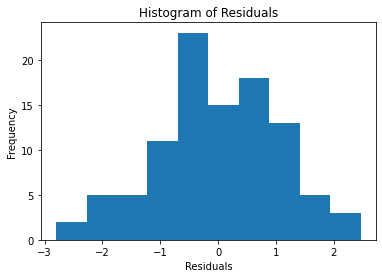

In [211]:
X = np.random.normal(0, 1, size=100)
y = 2*X + np.random.normal(0, 1, size=100)

# Fit a linear regression model to the data
reg = LinearRegression().fit(X.reshape(-1, 1), y)

# Get the predicted values and residuals from the model
y_pred = reg.predict(X.reshape(-1, 1))
residuals = y - y_pred

# Create a histogram of the residuals
plt.hist(residuals, bins=10)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

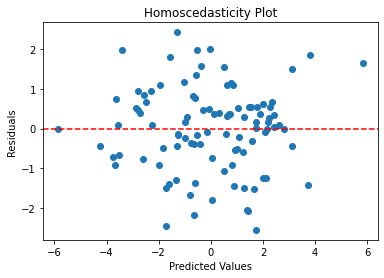

In [191]:
# Generate some random data for demonstration purposes
x = np.random.randn(100)
y = 2*x + np.random.randn(100)

# Fit a linear regression model to the data
model = np.polyfit(x, y, 1)
predict = np.poly1d(model)

# Calculate the residuals
residuals = y - predict(x)

# Plot the residuals against the predicted values
plt.scatter(predict(x), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Plot')
plt.show()